<a href="https://colab.research.google.com/github/ananddiv/datascience/blob/Linear-Regression/Multi_collinearity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
from pprint import pprint
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
%matplotlib inline


In [2]:
# Read the file named "colinearity.csv" into a Pandas dataframe
df = pd.read_csv("colinearity.csv")


In [3]:
# Take a quick look at the dataset
df.head()


,x1,x2,x3,x4,y
0,-1.109823,-1.172554,-0.897949,-6.572526,-158.193913
1,0.288381,0.360526,2.298690,3.884887,198.312926
2,-1.059194,0.833067,0.285517,-1.225931,12.152087
3,0.226017,1.979367,0.744038,5.380823,190.281938
4,0.664165,-1.373739,0.317570,-0.437413,-72.681681


#### Creation of Linear Regression Objects

In [7]:
# Choose all the predictors as the variable 'X' (note capitalization of X for multiple features)
X = df.drop(['y'],axis=1)

# Choose the response variable 'y'
y = df.y.values


In [10]:
y

array([-1.58193913e+02,  1.98312926e+02,  1.21520866e+01,  1.90281938e+02,
       -7.26816812e+01,  6.74366701e+01,  5.77120784e+01,  3.39343114e+01,
        1.33982719e+01, -1.08352637e+01, -1.19091226e+02,  7.71027663e+01,
        5.84400774e+01,  1.01923308e+02, -1.88228527e+01, -3.73135951e+01,
       -1.51135072e+02,  7.25235223e+00,  5.16213225e+01,  1.15912805e+01,
       -2.01425238e+01, -1.82253658e+02,  9.33041344e+01, -4.28230899e+01,
       -8.29134848e+01,  1.64770398e+01, -5.74157547e+01,  9.32145511e+01,
        1.12864256e+02,  1.17917536e+02,  4.29928182e+01,  1.27600533e+02,
        7.72218624e+00, -4.42474458e+01,  1.59424846e+01, -4.85283544e+01,
       -4.40746119e+01,  4.37466819e+00,  3.59913200e+01,  1.63034026e+01,
       -2.63269772e+01, -4.42925857e+01, -1.05197215e+01,  4.05609902e+00,
       -8.73193483e+01,  1.13389959e+02, -6.42452698e+01,  9.69144213e+01,
        8.07578291e+01, -2.68719087e+02, -1.06416945e+02, -4.60834767e+01,
        9.64725459e+01,  

In [11]:
### edTest(test_coeff) ###

# Initialize a list to store the beta values for each linear regression model
linear_coef = []

# Loop over all the predictors
# In each loop "i" holds the name of the predictor
for i in X:

    # Set the current predictor as the variable x
    x = df[[i]]

    # Create a linear regression object
    linreg = LinearRegression()

    # Fit the model with training data
    # Remember to choose only one column at a time i.e. given by x (not X)
    linreg.fit(x,y)

    # Add the coefficient value of the model to the list
    linear_coef.append(linreg.coef_)


### Multi-Linear Regression using all variables

In [12]:
### edTest(test_multi_coeff) ###

# Perform multi-linear regression with all predictors
multi_linear = LinearRegression()

# Fit the multi-linear regression on all features of the entire data
multi_linear.fit(X,y)

# Get the coefficients (plural) of the model
multi_coef = multi_linear.coef_


#### Printing the individual $\beta$ values

In [13]:
# Helper code to see the beta values of the linear regression models

print('By simple(one variable) linear regression for each variable:', sep = '\n')

for i in range(4):
    pprint(f'Value of beta{i+1} = {linear_coef[i][0]:.2f}')


By simple(one variable) linear regression for each variable:
'Value of beta1 = 34.73'
'Value of beta2 = 68.63'
'Value of beta3 = 59.40'
'Value of beta4 = 20.92'


In [14]:
# Helper code to compare with the values from the multi-linear regression
print('By multi-Linear regression on all variables')
for i in range(4):
    pprint(f'Value of beta{i+1} = {round(multi_coef[i],2)}')


By multi-Linear regression on all variables
'Value of beta1 = -24.61'
'Value of beta2 = 27.72'
'Value of beta3 = 37.67'
'Value of beta4 = 19.27'


⏸ Why do you think the $\beta$ values are different in the two cases?

#### A. Because the random seed selected is not as random as we would imagine.
#### B. Because of collinearity between $\beta_1$ and $\beta_4$
#### C. Because multi-linear regression is not a stable model
#### D. Because of the measurement error in the data


In [ ]:
### edTest(test_chow1) ###
# Submit an answer choice as a string below
# (Eg. if you choose option C, put 'C')
answer1 = 'B'


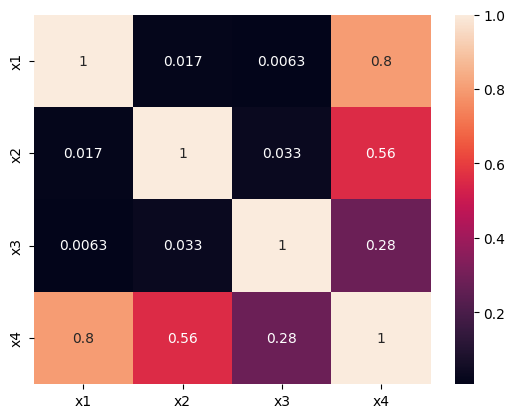

In [15]:
# Helper code to visualize the heatmap of the covariance matrix
corrMatrix = df[['x1','x2','x3','x4']].corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()


In [16]:
corrMatrix

,x1,x2,x3,x4
x1,1.000000,0.017489,0.006310,0.800016
x2,0.017489,1.000000,0.032708,0.555751
x3,0.006310,0.032708,1.000000,0.280217
x4,0.800016,0.555751,0.280217,1.000000
